In [13]:
%cd D:\Europhotonics Masters\MATLAB\LAM\03_April part2\New folder

D:\Europhotonics Masters\MATLAB\LAM\03_April part2\New folder


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import imageio.v3 as iio
import skimage as ski
import cv2
import os
from scipy.optimize import curve_fit

from scipy.ndimage import label, center_of_mass
from ipynb.fs.full.phase_unwrap import phase_unwrap, _wrapToPi
import matplotlib.colors as mcolors
import glob
def rms(data):
    return np.sqrt(np.mean(np.square(data)))

In [15]:
import pandas as pd

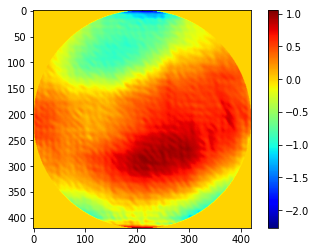

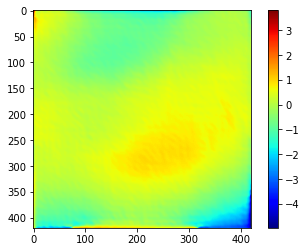

In [19]:
f = np.load('frame_0000.npy', allow_pickle = True)
plt.imshow(f*mask, cmap='jet')
plt.colorbar()
plt.show()
plt.imshow(f, cmap='jet')
plt.colorbar()
plt.show()

In [20]:
rms_1 = []
for i in range(1000):
    f = np.load(f'frame_{i:04d}.npy', allow_pickle = True)
    rms_1.append(rms(f*mask))

In [10]:
# Get image dimensions
height, width = (420,420)

# Calculate center coordinates
center_x = width // 2
center_y = height // 2

# Define radius of the circular mask
radius = min(center_x, center_y)  # Use the smaller dimension to ensure the circle fits

# Create a meshgrid of coordinates
Y, X = np.ogrid[:height, :width]

# Calculate distance from the center for each point
dist_from_center = np.sqrt((X - center_x)**2 + (Y - center_y)**2)

# Create the circular mask
mask = dist_from_center <= radius

In [21]:
df = pd.DataFrame(rms_1)
df.to_excel("rms_f.xlsx", index=True, header=True, engine="openpyxl")